In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [278]:
df = pd.read_csv("train.csv")

In [15]:
df.columns

Index(['datetime_0', 'target', 'number_0', 'number_1', 'number_2', 'number_3',
       'number_4', 'number_5', 'number_6', 'number_7', 'number_8', 'number_9',
       'number_10', 'number_11', 'number_12', 'number_13', 'number_14',
       'number_15', 'number_16', 'number_17', 'number_18', 'number_19',
       'number_20', 'number_21', 'number_22', 'number_23', 'number_24',
       'number_25', 'number_26', 'number_27', 'number_28', 'number_29',
       'number_30', 'number_31', 'number_32', 'number_33', 'number_34',
       'number_35', 'number_36', 'number_37', 'number_38', 'line_id'],
      dtype='object')

In [14]:
df.describe()

,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,...,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.605257,0.516228,0.205112,0.608632,0.852131,0.290996,0.666252,0.302688,0.646290,0.645210,...,0.084932,0.010959,0.032877,0.032877,0.032877,0.010959,0.010959,0.065753,0.041096,269.131507
std,16.731888,0.146753,0.127578,0.214655,0.166493,0.171512,0.249354,0.225507,0.256725,0.257029,...,0.279162,0.104252,0.178559,0.178559,0.178559,0.104252,0.104252,0.248191,0.198785,159.048922
min,0.000000,0.000000,0.000000,0.180905,0.000000,0.000000,0.181818,0.000000,0.186120,0.193651,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.420169,0.108137,0.424623,0.802669,0.196531,0.454545,0.121001,0.429022,0.431746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.000000
50%,27.186048,0.510069,0.178587,0.625628,0.878932,0.394839,0.636364,0.166898,0.630915,0.634921,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,269.000000
75%,32.193718,0.625153,0.283507,0.791457,0.941849,0.399707,0.909091,0.477051,0.905363,0.911111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,414.000000
max,95.249705,0.904415,0.557598,1.000000,1.000000,0.603106,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,535.000000


In [192]:
from sklearn.model_selection import train_test_split
features = [ col for col in df.columns if col.startswith('number')]
dummies = [col for col in df.columns if df[col].unique().shape[0] == 2]
X = df[dummies]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [27]:
rfc = RandomForestRegressor(random_state = 0)

In [29]:
from sklearn.metrics import mean_squared_error
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mean_squared_error(y_test, y_pred)

69.61173409930926

## TruncatedSVD

In [103]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


array([ 0.00715933,  0.0877199 ,  0.16409642,  0.23684604,  0.30626204,
        0.37395873,  0.43566107,  0.48718457,  0.53537439,  0.57882036,
        0.62038872,  0.66103838,  0.69967355,  0.7373555 ,  0.77395692,
        0.81044904,  0.84582053,  0.87983254,  0.9112575 ,  0.9318703 ,
        0.94899393,  0.96406088,  0.97675877,  0.9890179 ,  0.9935609 ,
        0.9963355 ,  0.99877992,  1.        ])

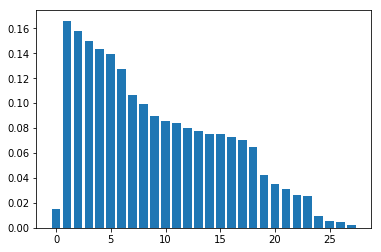

In [105]:
n_features = int(X.shape[1]-1)
svd = TruncatedSVD(n_components=n_features,random_state=0)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
plt.bar(list(range(n_features)), svd.explained_variance_);
svd.explained_variance_.cumsum() / svd.explained_variance_.sum()

In [110]:
X_train_svd = X_train_svd[:, (svd.explained_variance_.cumsum() / svd.explained_variance_.sum()) < 0.80 ]
X_test_svd = X_test_svd[:, (svd.explained_variance_.cumsum() / svd.explained_variance_.sum()) < 0.80 ]

rfc.fit(X_train_svd, y_train)
y_pred = rfc.predict(X_test_svd)
mean_squared_error(y_test, y_pred)

122.62113420244816

##  PCA

In [111]:
from sklearn.decomposition import PCA


array([ 0.08254375,  0.15952202,  0.23258107,  0.30211179,  0.36986895,
        0.43307049,  0.48475389,  0.53346997,  0.57691723,  0.61861891,
        0.65977126,  0.69867979,  0.73638108,  0.77298281,  0.80953624,
        0.84502434,  0.87903899,  0.91056821,  0.93158644,  0.94871666,
        0.96379742,  0.9767566 ,  0.98901572,  0.99356071,  0.99633549,
        0.99877991,  1.        ,  1.        ])

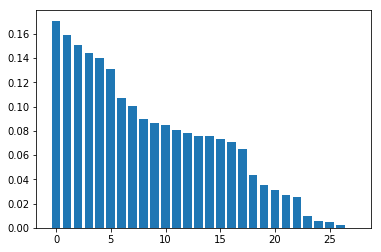

In [133]:
pca = PCA(n_components=int(n_features),random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar(list(range(int(n_features))), pca.explained_variance_);
pca.explained_variance_.cumsum() / pca.explained_variance_.sum()

In [134]:
X_train_pca = X_train_pca[:, (pca.explained_variance_.cumsum() / pca.explained_variance_.sum()) < 0.80 ]
X_test_pca = X_test_pca[:, (pca.explained_variance_.cumsum() / pca.explained_variance_.sum()) < 0.80 ]

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mean_squared_error(y_test, y_pred)

69.61173409930926

In [118]:
import seaborn as sns

In [167]:
x = rfc.feature_importances_
x.sort()
x = np.array(x[::-1])

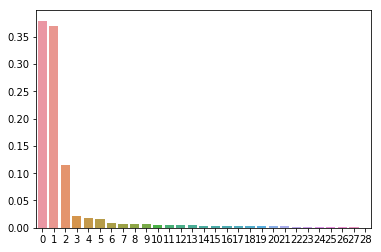

In [151]:
sns.barplot(x = list(range(len(rfc.feature_importances_))),y=x);

In [193]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mean_squared_error(y_test, y_pred)

55.657063346942834

In [315]:
X = df.drop('target', axis=1)
y = df['target']

In [357]:
def select_important_dummies(X, y, mode, importance=0.05, n_estimators=10):
    if mode == 'regression':
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators=n_estimators)
    elif mode == 'classification':
        from sklearn.ensemble import RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=n_estimators)
    
    dummies = [col for col in X.columns if X[col].unique().shape[0] == 2]
    rf.fit(X[dummies], y)
    important_features = pd.Series(dummies)[
        (rf.feature_importances_ / rf.feature_importances_.max() > importance)].tolist()
#     fearues_to_drop = list(set(dummies) - set(important_features))
#     return X.drop(labels=fearues_to_drop,axis=1)
    return important_features

In [301]:
import timeit
ls = []
for i in range(10, 200, 10):
    ls.append(timeit.timeit("select_importand_dummies(X, y, 'regression',importance=0.005,  n_estimators=i)",
                            globals={'select_importand_dummies':select_importand_dummies,
                                    'X':X,
                                    "y":y,
                                    "i":i}, number=10))
print(ls)

[0.40835169999991194, 0.9349419000000125, 1.171259199999895, 1.4757464999997865, 1.6749291999999514, 2.083532699999978, 2.5975272999999106, 3.265285800000129, 3.1799208999996154, 3.5796838999999636, 3.885696700000153, 4.1503060000000005, 4.7921087999998235, 5.065866299999925, 5.429051199999776, 5.893368600000031, 6.2669067999995605, 6.246452899999895, 7.139565199999652]


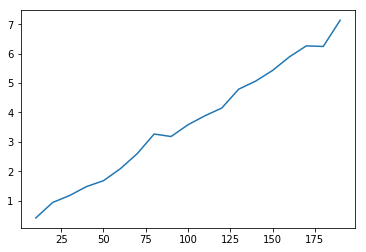

In [304]:
plt.plot(range(10, 200, 10),ls);

In [335]:
rfc200 = RandomForestRegressor(n_estimators=200)
rfc10 = RandomForestRegressor(n_estimators=10)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [336]:
%%timeit
rfc200.fit(X_train[dummies],y_train)
y_pred = rfc200.predict(X_test[dummies])
print(mean_squared_error(y_pred, y_test))

70.7805152148
70.4672232598
69.5180324316
71.6163503916
70.9108608841
70.9991076487
70.3330787886
70.0382754977
632 ms ± 55.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [362]:
%%timeit
importrant_features = select_important_dummies(X_train, y_train, 'regression')
rfc200.fit(X_train[importrant_features], y_train)
y_pred = rfc200.predict(X_test[importrant_features])
print(mean_squared_error(y_pred, y_test))

70.1795006826
70.0205574583
69.9872366199
70.0511664477
87.524699939
70.1222243458
70.0267752293
87.4273617068
526 ms ± 84.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
